In [1]:

# Library to support working with data
import numpy as np
import pandas as pd

# Graphing support library
import matplotlib.pyplot as plt

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Library to support building Linear Regression models
from sklearn.linear_model import LinearRegression

# Performance metrics calculation support library
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#Load data
df = pd.read_csv(r'C:\Users\dinhn\Downloads\XRP Historical Data.csv', on_bad_lines='skip', low_memory=False)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,0.3159,0.3141,0.3238,0.3120,444.26,0.56%
1,2019-03-02,0.3141,0.3159,0.3182,0.3105,286.01,-0.56%
2,2019-03-03,0.3111,0.3141,0.3154,0.3089,273.79,-0.97%
3,2019-03-04,0.3025,0.3111,0.3121,0.2979,328.22,-2.76%
4,2019-03-05,0.3151,0.3025,0.3179,0.3013,391.02,4.19%
...,...,...,...,...,...,...,...
1914,2024-05-28,0.5286,0.5339,0.5353,0.5218,451.13,-0.99%
1915,2024-05-29,0.5237,0.5286,0.5329,0.5201,501.98,-0.93%
1916,2024-05-30,0.5186,0.5237,0.5282,0.5132,533.93,-0.97%
1917,2024-05-31,0.5175,0.5186,0.5247,0.5129,487.46,-0.21%


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
# Select the Close column as the dependent variable
df_Price = df[['Price']]
df_Price = df_Price.reset_index(drop=True)

In [4]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Price))

In [5]:
# Split the data into training, validation and test dataset in a ratio of 6:4
train_size = int(0.6 * len(data_scaled))
test_size = int(0.4 * len(data_scaled))


train_data = data_scaled[: train_size]
test_data = data_scaled[train_size:]
     

In [6]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [7]:
# Training a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# Showing the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: -0.02547871368894733
Coefficients: [0.00043039]
R-squared: 0.4874939392620966


In [9]:
# Preparing testing data
x_test = np.array(range(train_size, len(data_scaled))).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred =  model.predict(x_test)

In [10]:
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSLE on Test dataset: ", test_msle)

MAPE on Test dataset:  1.5686469076381993
RMSE on Test dataset:  0.7399039481525593
MSLE on Test dataset:  0.16287836025610777


In [11]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

In [12]:
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted XRP prices for the next 30 days:')
print(y_next_30_days.flatten())

Predicted XRP prices for the next 30 days:
[1.49697915 1.49771093 1.49844272 1.49917451 1.4999063  1.50063808
 1.50136987 1.50210166 1.50283345 1.50356524 1.50429702 1.50502881
 1.5057606  1.50649239 1.50722417 1.50795596 1.50868775 1.50941954
 1.51015132 1.51088311 1.5116149  1.51234669 1.51307848 1.51381026
 1.51454205 1.51527384 1.51600563 1.51673741 1.5174692  1.51820099]


In [13]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

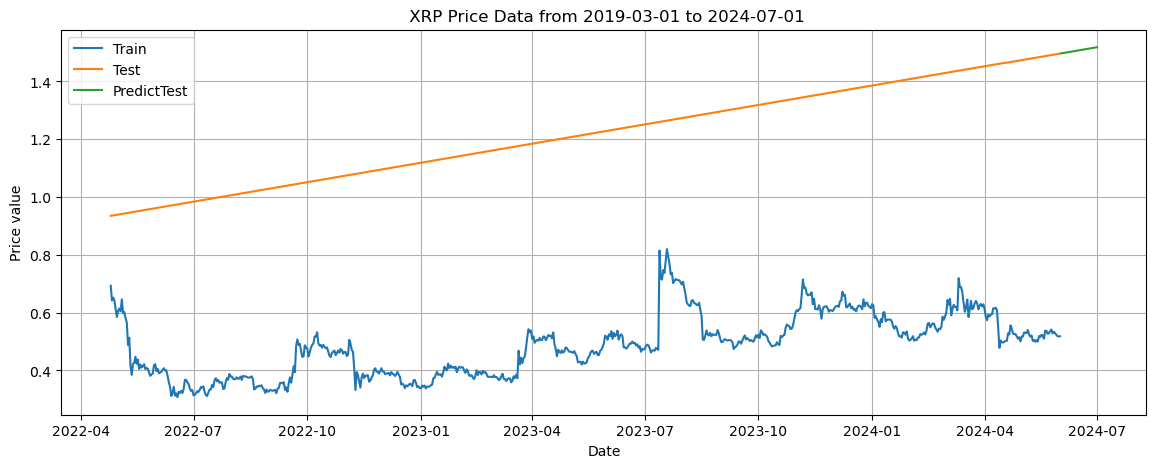

In [14]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next30Day'])

plt.grid()
plt.title(f" XRP Price Data to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('LR_624_XRP_30d.png')
plt.show()
     

<h2> Predict for 60 days </h2>

In [15]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)

In [16]:
# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted XRP prices for the next 60 days:')
print(y_next_60_days.flatten())

Predicted XRP prices for the next 60 days:
[1.49697915 1.49771093 1.49844272 1.49917451 1.4999063  1.50063808
 1.50136987 1.50210166 1.50283345 1.50356524 1.50429702 1.50502881
 1.5057606  1.50649239 1.50722417 1.50795596 1.50868775 1.50941954
 1.51015132 1.51088311 1.5116149  1.51234669 1.51307848 1.51381026
 1.51454205 1.51527384 1.51600563 1.51673741 1.5174692  1.51820099
 1.51893278 1.51966456 1.52039635 1.52112814 1.52185993 1.52259172
 1.5233235  1.52405529 1.52478708 1.52551887 1.52625065 1.52698244
 1.52771423 1.52844602 1.52917781 1.52990959 1.53064138 1.53137317
 1.53210496 1.53283674 1.53356853 1.53430032 1.53503211 1.53576389
 1.53649568 1.53722747 1.53795926 1.53869105 1.53942283 1.54015462]


In [17]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

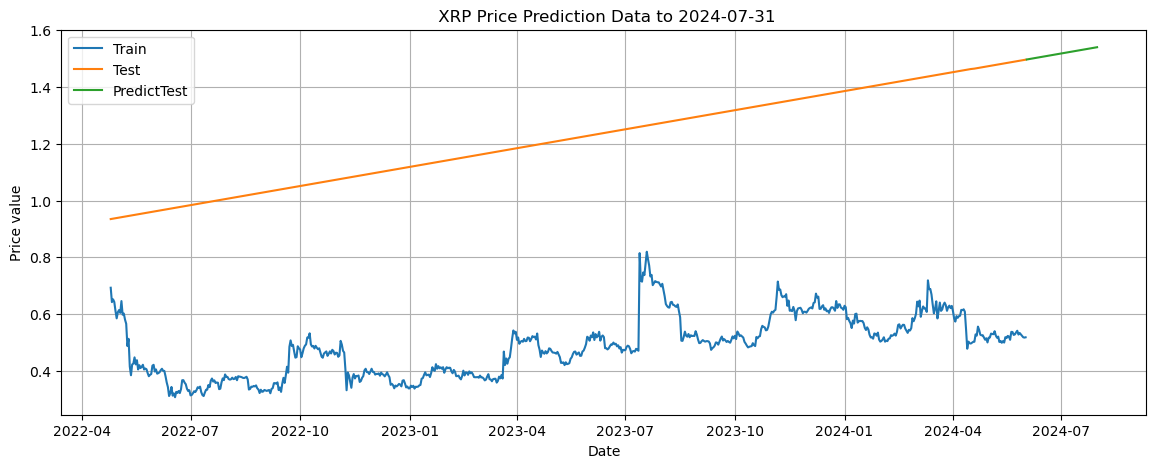

In [23]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next60Day'])

plt.grid()
plt.title(f" XRP Price Prediction Data to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('LR_624_XRP_60d.png')
plt.show()

<h2> Predict 90 days
    </h2>

In [19]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [20]:
# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted XRP prices for the next 90 days:')
print(y_next_90_days.flatten())

Predicted XRP prices for the next 90 days:
[1.49697915 1.49771093 1.49844272 1.49917451 1.4999063  1.50063808
 1.50136987 1.50210166 1.50283345 1.50356524 1.50429702 1.50502881
 1.5057606  1.50649239 1.50722417 1.50795596 1.50868775 1.50941954
 1.51015132 1.51088311 1.5116149  1.51234669 1.51307848 1.51381026
 1.51454205 1.51527384 1.51600563 1.51673741 1.5174692  1.51820099
 1.51893278 1.51966456 1.52039635 1.52112814 1.52185993 1.52259172
 1.5233235  1.52405529 1.52478708 1.52551887 1.52625065 1.52698244
 1.52771423 1.52844602 1.52917781 1.52990959 1.53064138 1.53137317
 1.53210496 1.53283674 1.53356853 1.53430032 1.53503211 1.53576389
 1.53649568 1.53722747 1.53795926 1.53869105 1.53942283 1.54015462
 1.54088641 1.5416182  1.54234998 1.54308177 1.54381356 1.54454535
 1.54527713 1.54600892 1.54674071 1.5474725  1.54820429 1.54893607
 1.54966786 1.55039965 1.55113144 1.55186322 1.55259501 1.5533268
 1.55405859 1.55479037 1.55552216 1.55625395 1.55698574 1.55771753
 1.55844931 1.559181

In [21]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

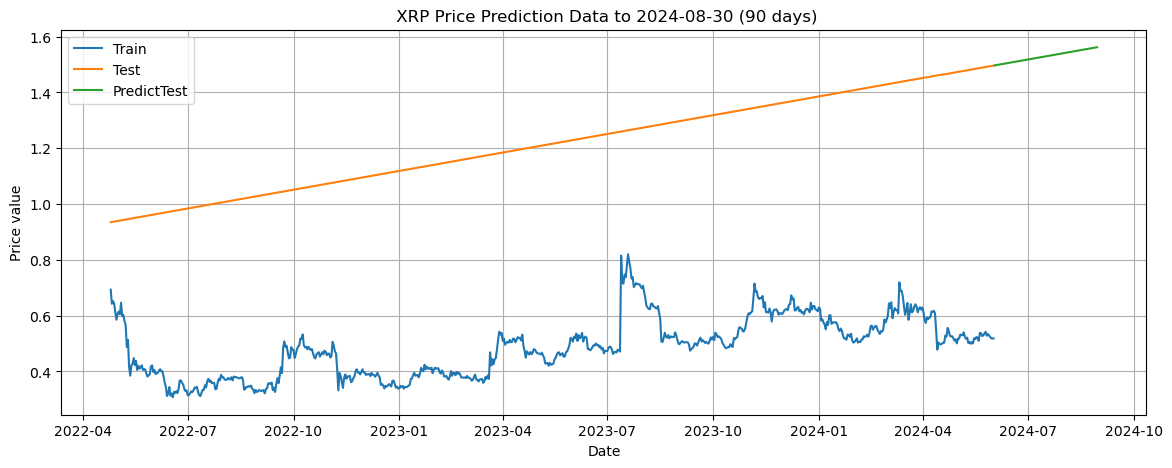

In [25]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next90Day'])

plt.grid()
plt.title(f" XRP Price Prediction Data to {index_next_90_days[-1].strftime('%Y-%m-%d')} (90 days)")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('LR_624_XRP_90d.png')
plt.show()